# Decision Tree

- Information theoty based learning의 방법을 이용
- Decision Tree Classifier
    -  Data를 가장 잘 구분할 수 있는 Tree를 구성함
        - Deep Learning보다 적은 연산, 저사양 시스템으로도 처리 가능
        - 앙상블, 스태킹에 원형이 되는 기법
        - 강력한 분류기를 만들 수 있음
        - structed data을 처리하는데 도움이 됨

### 1. Decision Tree 만들기

- 어떤 질문(attribute)이 가장 많은 해답(Y)을 줄 것인가?(= 어떤 질문이 **답의 모호성**을 줄여줄 것인가?)
- 문제를 통해서 splitting point을 설정
    - 남은 정보로 splitting point를 설정하는 식
- Decision Tree를 만드는(성장) 알고리즘이 필요
    - 어떻게 하면 **분기(branch)**를 가장 잘 만들 수 있는가?
        - Data의 attribute를 기준으로 분기를 생성
        - 어떤 attibute를 기준으로 분기했을때 entropy가 가장 작은가?
    - 하나를 split한 다음 그 다음은 어떻게 할 수 있는가?
- Decision Tree는 재귀적으로 생김
- 대상 라벨에 대해 어떤 attribute가 더 **확실한 정보**를 제공하고 있는가?로 branch attribute를 선택
    - entropy, gini 고려
    - 확실한 정보의 선택 기준은 알고리즘 별로 차이가 남
- Tree 생성 후 prunning을 통해 tree generalization 시행
    - overfitting 문제 해결
- 일반적으로 효율을 위해 binary tree를 사용

### 2. Decision Tree의 특징

- 비교적 간단하고 직관적으로 결과를 표현
- 훈련시간이 길고, 메모리 공간을 많이 사용함
- Top-down, Recursive, Divide and Conquer 기법 이용
    - Greedy 알고리즘
    - 부분 최적화
- 장점
    - tree의 상단부분 attribute들이 가장 중요한 예측 변수
        - attribute 선택 기법으로도 활용 가능
    - attribute의 scaling이 필요 없음
    - 관측치의 절대값이 아닌 순서가 중요
        - outlier에 이점
    - 자동적 변수 부분 선택
        -  tree pruning

### 3. Decision Tree 알고리즘

- 크게 두가지 형태의 dicision tree 알고리즘 존재
    - 알고리즘 별 attribute branch 방법이 다름
    - ID3: C4.5(Ross Quinlan): entropy
    - CART(현재 더 많이 사용함, classification and regularization tree): gini
- 연속형 변수를 위한 regression tree도 존재

### 4. Entropy, information gain

#### 1) Entropy

- 정보를 나누는 기준
- 목적 달성을 위한 경우의 수를 정량적으로 표현하는 수치
    - 작을 수록 경우의 수가 적음(**Entropy가 작으면 얻을 수 있는 정보가 명확하다.**)
- Higher Entropy
    - Higher uncertainty
- Lower Entropy
    - Lower uncertainty

$$h(D) = - \sum_{i=1}^{m}p_i\log_2(p_i) \qquad  
where =
\begin{cases}
D, & Data \, set \\
P_i, & Probability \, of \, label \, i
\end{cases} $$

**전체 데이터 D의 정보량(attribute가 category값이라고 가정):**
$$
Info(D) = -\sum_{i=1}^{n}p_i\log_2(p_i)
$$

- 확률 $p_i$가 1이면 Entropy는 0 (= 명확함)
- 확률 $p_i$가 작을 수록 Entopy가 커짐(= 불확실성 증가)

In [1]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

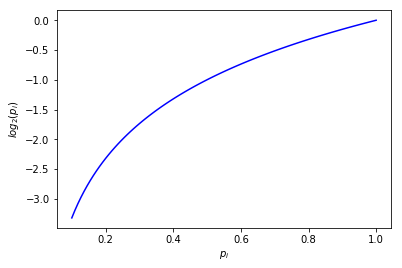

In [2]:
x = np.linspace(0.1, 1.0, 100)
y = np.log2(x)
plt.xlabel("$p_i$")
plt.ylabel("$log_2(p_i)$")
plt.plot(x, y, color="blue")

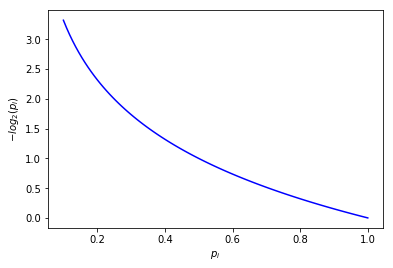

In [3]:
x = np.linspace(0.1, 1.0, 100)
y = -np.log2(x)
plt.xlabel("$p_i$")
plt.ylabel("$-log_2(p_i)$")
plt.plot(x, y, color="blue")

#### 2) Information Gain

- Entropy 함수를 도입하여 branch splitting
- Information Gain: entropy를 사용하여 속성별 분류시 impurity를 측정하는 지표
- 속성 별 infomation gain을 계산하는 방법
    - information gain = 전체 Entropy - 속성별 Entropy
    - 속성별 entropy가 낮은 것을 우선적으로 하여 분류

**속성 A로 분류 시 정보량:**
$$
Info_A(D) = \sum_{j=1}^{\upsilon}\frac{\left|D_j \right|}{\left|D \right|}*Info(D_j)
\qquad A:Atrribute, \, j:information \, A \, label
$$

**A 속성의 정보 소득:**
$$
Gain(A) = Info(D_j) - Info_A(D) 
$$

- Info_A(D)의 값이 클수록 Gain(A)는 작음
- Info_A(D)의 값이 작을수록 Gain(A)는 큼

### 5. ID3 알고리즘 Process

### 6. ID3알고리즘 예제

#### 1) 데이터 로딩

In [4]:
import pandas as pd
import numpy as np

In [5]:
pd_data = pd.read_csv('http://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [6]:
#  불필요한 RID column 삭제
pd_data = pd_data.drop('RID', axis=1)

#### 2) 전체 데이터의 Entropy

$$
Info(D) = -\sum_{i=1}^{n}p_i\log_2(p_i)
$$

In [7]:
buy = pd_data.loc[pd_data['class_buys_computer'] == 'yes']
not_buy = pd_data.loc[pd_data['class_buys_computer'] == 'no']

In [8]:
buy

,age,income,student,credit_rating,class_buys_computer
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
6,middle_aged,low,yes,excellent,yes
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes
10,youth,medium,yes,excellent,yes
11,middle_aged,medium,no,excellent,yes
12,middle_aged,high,yes,fair,yes


In [9]:
not_buy

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
5,senior,low,yes,excellent,no
7,youth,medium,no,fair,no
13,senior,medium,no,excellent,no


In [10]:
x = np.array([len(buy)/len(pd_data), len(not_buy)/len(pd_data)])
y = np.log2(x)

In [11]:
info_all = -sum(x*y)
info_all

0.9402859586706311

**함수로 구현**

In [12]:
def get_info(df):
    buy = df.loc[df['class_buys_computer'] == 'yes']
    not_buy = df.loc[df['class_buys_computer'] == 'no']
    
    x = np.array([len(buy)/len(df), len(not_buy)/len(df)])
    y = np.log2(x[x!=0])
    
    info_all = -sum(x[x!=0] * y)
    return info_all

In [13]:
get_info(pd_data)

0.9402859586706311

#### 3) Attribute별 infomation gain

**속성 A로 분류 시 정보량:**
$$
Info_A(D) = \sum_{j=1}^{\upsilon}\frac{\left|D_j \right|}{\left|D \right|}*Info(D_j)
\qquad A:Atrribute, \, j:information \, A \, label
$$

In [295]:
def get_attribute_info(df, attribute_name):
    attribute_values = df[attribute_name].unique()
    #print("attribute_name: {}, values: {}".format(attribute_name, attribute_values))
    get_infos = []
    
    for value in attribute_values:
        split_df = df.loc[df[attribute_name] == value]
        get_infos.append((len(split_df)/len(df)) * get_info(split_df))
        info_attr = sum(get_infos)
    return info_attr

#### 4) Attribute별 별 정보 소득에 따라 branch할 Attribute별 찾기

**속성 별 정보 소득:**
$$
Gain(A) = Info(D_j) - Info_A(D) 
$$

**자동으로 구해주는 함수(직접구현하여 잘 못 되었을 수도 있음)**

In [331]:
def ordered_get_gain(df, exception_names):
    attribute_names = []

    for col_name in pd_data.columns.values:
        for i in range(len(exception_names)):
            if(exception_names[i] != col_name):
                if((col_name in attribute_names) == False):
                    attribute_names.append(col_name)
            else:
                if((col_name in attribute_names) == True):
                    attribute_names.remove(col_name)
                break

    df_gain = pd.DataFrame(None, index=attribute_names, columns=["gain"])
    
    for name in attribute_names:
        info_gain = get_info(df) - get_attribute_info(df, name)
        df_gain.loc[name] = info_gain
    
    # 내림차순 정렬
    df_gain.sort_values(by="gain", ascending=False)
    
    return df_gain

#### 5) 첫 번째 branch 속성 찾기

##### i. "age"로 분류시 information gain

$$
Gain(age) = Info(D_j) - Info_{age}(D) 
$$

##### ii. "income"로 분류시 information gain

$$
Gain(income) = Info(D_j) - Info_{income}(D) 
$$

##### iv. "student"로 분류시 information gain

$$
Gain(student) = Info(D_j) - Info_{student}(D) 
$$

##### iv. "credit_rating"로 분류시 information gain

$$
Gain(credit\_rating) = Info(D_j) - Info_{credit\_rating}(D) 
$$

In [332]:
first_gain = ordered_get_gain(pd_data, ["class_buys_computer"])
first_gain

,gain
age,0.24675
income,0.0292226
student,0.151836
credit_rating,0.048127


**$\Rrightarrow$ information gain이 가장 큰 "age"로 우선 분류**

In [319]:
pd_data["age"].unique()

array(['youth', 'middle_aged', 'senior'], dtype=object)

In [320]:
youth = pd_data.loc[pd_data["age"] == "youth"]
youth

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
10,youth,medium,yes,excellent,yes


In [321]:
middle_aged = pd_data.loc[pd_data["age"] == "middle_aged"]
middle_aged

,age,income,student,credit_rating,class_buys_computer
2,middle_aged,high,no,fair,yes
6,middle_aged,low,yes,excellent,yes
11,middle_aged,medium,no,excellent,yes
12,middle_aged,high,yes,fair,yes


In [322]:
senior = pd_data.loc[pd_data["age"] == "senior"]
senior

,age,income,student,credit_rating,class_buys_computer
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
9,senior,medium,yes,fair,yes
13,senior,medium,no,excellent,no


#### 6) 두 번째 branch할 속성 찾기

In [323]:
youth

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
10,youth,medium,yes,excellent,yes


In [333]:
second_gain = ordered_get_gain(youth, ["class_buys_computer", "age"])
second_gain

,gain
income,0.570951
student,0.970951
credit_rating,0.0199731


**$\Rrightarrow$ information gain이 가장 큰 "student"로 우선 분류**

In [325]:
youth.loc[youth["student"] == "no"]

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
7,youth,medium,no,fair,no


In [326]:
youth.loc[youth["student"] == "yes"]

,age,income,student,credit_rating,class_buys_computer
8,youth,low,yes,fair,yes
10,youth,medium,yes,excellent,yes


#### 7) 세 번째 branch할 속성 찾기

In [327]:
senior

,age,income,student,credit_rating,class_buys_computer
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
9,senior,medium,yes,fair,yes
13,senior,medium,no,excellent,no


In [334]:
third_gain = ordered_get_gain(senior, ["age", "student", "class_buys_computer"])
third_gain

,gain
income,0.0199731
credit_rating,0.970951


**$\Rrightarrow$ information gain이 가장 큰 "credit_rating"으로 분류**

In [329]:
senior.loc[senior["credit_rating"] == "fair"]

,age,income,student,credit_rating,class_buys_computer
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [330]:
senior.loc[senior["credit_rating"] == "excellent"]

,age,income,student,credit_rating,class_buys_computer
5,senior,low,yes,excellent,no
13,senior,medium,no,excellent,no


### 7. C4.5/CART & Gini Index

#### 1) Information Gain의 문제점

- Attribute에 포함된 값이 다양할 수록 선택하고자 함
    - 보완을 해줄 다른 measure가 필요
- ID3의 발전형인 C4.5와 CART에서 사용하는 measuure 사용
    - Attribute에 포함된 값이 다양할 경우 그 값에 대해 패널티를 주는 것과 동일

$$
SplitInfo_A(D) = -\sum_{j=1}^{\upsilon}\frac{\left|D_j \right|}{\left|D \right|}*\left( \log_2{\frac{\left|D_j \right|}{\left|D \right|}} \right)
\qquad A:Atrribute, \, j:information \, A \, label
$$

$$
GainRatio(A) = \frac{Gain(A)}{SplitInfo_A(D)} = \frac{Info(D) - Info_A(D)}{SplitInfo_A(D)}
$$

- $SplitInfo_A(D)$의 값이 클수록 $GainRatio(A)$는 작아짐

#### 2) Gini Index

- CART 알고리즘의 split measure
- 훈련 튜플 세트를 파티션으로 나누었을 때 불순한 정도 측정
- 데이터의 대상 속성을 얼마나 잘못 분류했는지를 계산
- 실제 Gini index는 entropy와 비슷한 그래프가 그려짐

$$
Gini(D) = 1 - \sum_{i=1}^{m}p_i^2 = 1 - \sum_{i=1}^{m}\frac{\left|C_i,D \right|}{\left|D \right|}
\qquad where \, C_i \, is \, a \, class
$$

- CART 알고리즘은 Binary split을 전제로 분석함
    - k기 attribute 내 데이터 분류의 개수일 때
        - $2^{k-1}-1$개 만큼의 split 생성(c4.5알고리즘에 비해 많은 split)

$$
Gini_A(D) = \frac{\left|D_1 \right|}{\left|D \right|} Gini(D_1)
+ \frac{\left|D_2 \right|}{\left|D \right|} Gini(D_2)
$$

#### 3) 예제구현

In [335]:
pd_data.columns

Index(['age', 'income', 'student', 'credit_rating', 'class_buys_computer'], dtype='object')

$$
Gini_{age}(D) \quad age \in \left\{ youth, middle\_age, senior \right\}
$$

In [336]:
pd_data["age"].unique()

array(['youth', 'middle_aged', 'senior'], dtype=object)

$$
age_1 \in \left\{ youth \right\} = \left\{ middle\_age, senior \right\}
$$

In [337]:
youth = pd_data.loc[pd_data["age"] == "youth"]
youth

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
10,youth,medium,yes,excellent,yes


In [338]:
middle_senior = pd_data.loc[pd_data.index.difference(youth.index)]
middle_senior

,age,income,student,credit_rating,class_buys_computer
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
9,senior,medium,yes,fair,yes
11,middle_aged,medium,no,excellent,yes
12,middle_aged,high,yes,fair,yes
13,senior,medium,no,excellent,no


$$
age_2 \in \left\{ middle\_age \right\} = \left\{ youth, senior \right\} \\
age_3 \in \left\{ senior \right\} = \left\{ youth, middle\_age  \right\}
$$